In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

def get_class_subclass_directories(root_dir, exclude_dir):
    """
    Generates a list of (class, subclass) directory tuples from the root directory,
    excluding the specified directory.
    """
    class_subclass_dirs = []
    for class_dir in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_dir)
        if os.path.isdir(class_path) and class_dir.lower() != exclude_dir.lower():
            for subclass_dir in os.listdir(class_path):
                subclass_path = os.path.join(class_path, subclass_dir)
                if os.path.isdir(subclass_path):
                    class_subclass_dirs.append((class_dir, subclass_dir))
    return class_subclass_dirs

base_dir = 'Multi-Cancer'
filtered_dirs = get_class_subclass_directories(base_dir, 'all')

# Print out the directories being used
for class_dir, subclass_dir in filtered_dirs:
    print(f"Class: {class_dir}, Subclass: {subclass_dir}")


2023-12-05 22:17:47.350933: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 22:17:47.391841: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 22:17:47.391872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 22:17:47.392912: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 22:17:47.399319: I tensorflow/core/platform/cpu_feature_guar

Class: Oral Cancer, Subclass: train
Class: Oral Cancer, Subclass: val
Class: Oral Cancer, Subclass: test
Class: Oral Cancer, Subclass: oral_scc
Class: Oral Cancer, Subclass: oral_normal
Class: Colon Cancer, Subclass: colon_aca
Class: Colon Cancer, Subclass: test
Class: Colon Cancer, Subclass: colon_bnt
Class: Colon Cancer, Subclass: val
Class: Colon Cancer, Subclass: train
Class: Lung Cancer, Subclass: lung_bnt
Class: Lung Cancer, Subclass: lung_scc
Class: Lung Cancer, Subclass: val
Class: Lung Cancer, Subclass: test
Class: Lung Cancer, Subclass: lung_aca
Class: Lung Cancer, Subclass: train
Class: Cervical Cancer, Subclass: val
Class: Cervical Cancer, Subclass: train
Class: Cervical Cancer, Subclass: cervix_sfi
Class: Cervical Cancer, Subclass: test
Class: Cervical Cancer, Subclass: cervix_mep
Class: Cervical Cancer, Subclass: cervix_koc
Class: Cervical Cancer, Subclass: cervix_pab
Class: Cervical Cancer, Subclass: cervix_dyk
Class: Breast Cancer, Subclass: breast_malignant
Class: Brea

In [2]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

def create_generators(base_dir, class_dir, batch_size, target_size=(200, 200)):
    print("Batch size received in create_generators:", batch_size)
    # Rest of the function code
    """
    Create training, validation, and testing generators.
    """
    # Data generator with augmentation for training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Data generator without augmentation for validation and testing
    val_test_datagen = ImageDataGenerator(rescale=1./255)

    # Training generator
    train_generator = train_datagen.flow_from_directory(
        os.path.join(base_dir, class_dir, 'train'),
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    # Validation generator
    validation_generator = val_test_datagen.flow_from_directory(
        os.path.join(base_dir, class_dir, 'val'),
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Testing generator
    test_generator = val_test_datagen.flow_from_directory(
        os.path.join(base_dir, class_dir, 'test'),
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False  # Usually, we don't shuffle the test data
    )

    return train_generator, validation_generator, test_generator


In [3]:
from tensorflow.keras.models import load_model

def load_trained_model(model_path):
    return load_model(model_path)



Evaluating model for Colon Cancer


2023-12-05 22:17:51.727393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 858 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:1c:00.0, compute capability: 8.0
2023-12-05 22:17:51.729516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78664 MB memory:  -> device: 1, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:1f:00.0, compute capability: 8.0
2023-12-05 22:17:51.731482: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 71323 MB memory:  -> device: 2, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:22:00.0, compute capability: 8.0
2023-12-05 22:17:51.733555: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 78664 MB memory:  -> device: 3, name: NVIDIA A100 80GB PCIe, pci bus 

Batch size received in create_generators: 16
Found 7500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


2023-12-05 22:17:54.099374: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2023-12-05 22:17:54.212165: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-05 22:17:54.293456: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 408.69MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-05 22:17:54.347942: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 408.69MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-05 22:17:54.405582: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) r

63/63 [==============================] - 4s 51ms/step - loss: 0.1683 - accuracy: 0.9500
Test Loss, Test Accuracy: [0.16834737360477448, 0.949999988079071]


2023-12-05 22:17:57.666639: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 308.57MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-05 22:17:57.680065: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 308.57MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


63/63 [==============================] - 3s 45ms/step
Classification Report:

              precision    recall  f1-score   support

   colon_aca       1.00      0.90      0.95       500
   colon_bnt       0.91      1.00      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



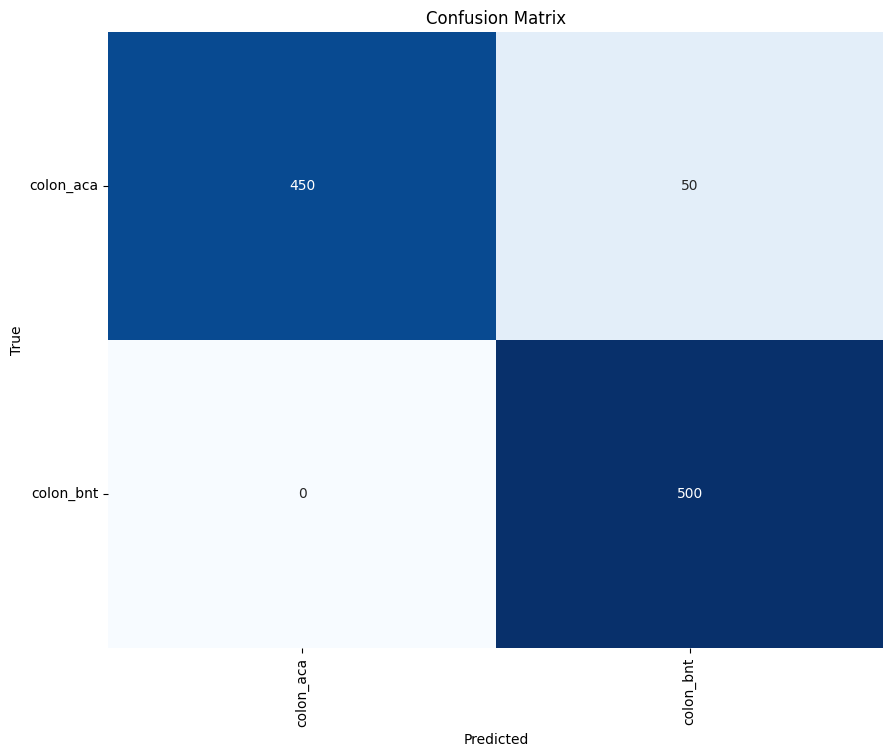

Evaluating model for Lung Cancer
Batch size received in create_generators: 16
Found 11250 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
94/94 [==============================] - 5s 51ms/step - loss: 0.1667 - accuracy: 0.9207
Test Loss, Test Accuracy: [0.1667425036430359, 0.9206666946411133]


2023-12-05 22:18:08.160875: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 310.53MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-05 22:18:08.179299: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 310.53MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-05 22:18:08.217294: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 324.82MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-05 22:18:08.233046: W external/local_tsl/tsl/framewor

94/94 [==============================] - 5s 46ms/step
Classification Report:

              precision    recall  f1-score   support

    lung_aca       0.89      0.87      0.88       500
    lung_bnt       1.00      0.96      0.98       500
    lung_scc       0.88      0.93      0.91       500

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



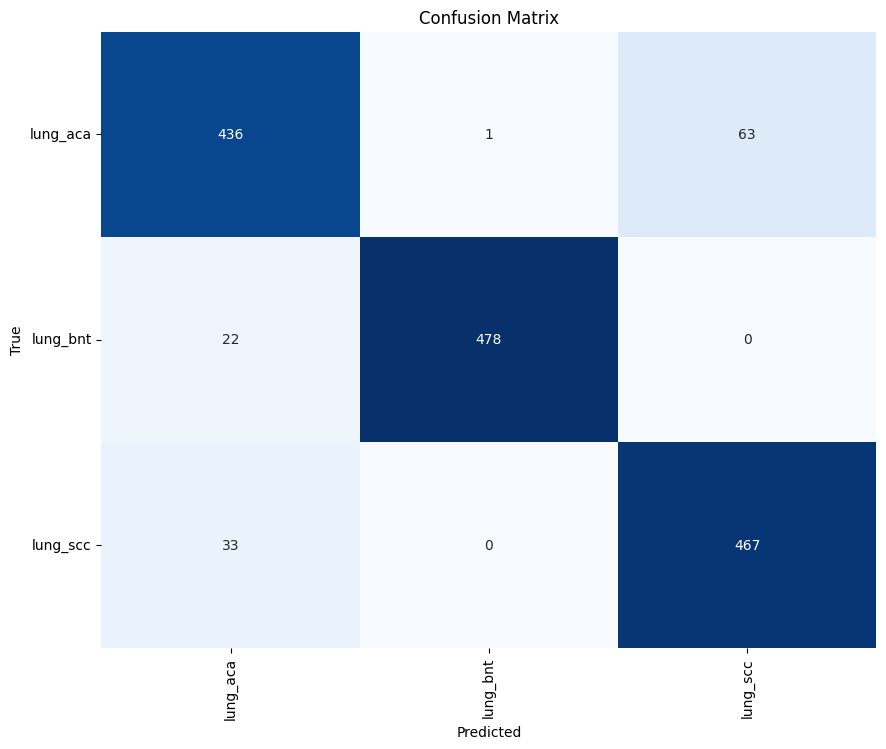

Evaluating model for Cervical Cancer
Batch size received in create_generators: 16
Found 18750 images belonging to 5 classes.
Found 3750 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.
157/157 [==============================] - 7s 46ms/step - loss: 0.1599 - accuracy: 0.9440
Test Loss, Test Accuracy: [0.15986283123493195, 0.9440000057220459]
157/157 [==============================] - 7s 45ms/step
Classification Report:

              precision    recall  f1-score   support

  cervix_dyk       0.95      0.88      0.92       500
  cervix_koc       0.85      0.94      0.89       500
  cervix_mep       0.98      0.93      0.96       500
  cervix_pab       0.97      1.00      0.99       500
  cervix_sfi       0.98      0.97      0.97       500

    accuracy                           0.94      2500
   macro avg       0.95      0.94      0.94      2500
weighted avg       0.95      0.94      0.94      2500



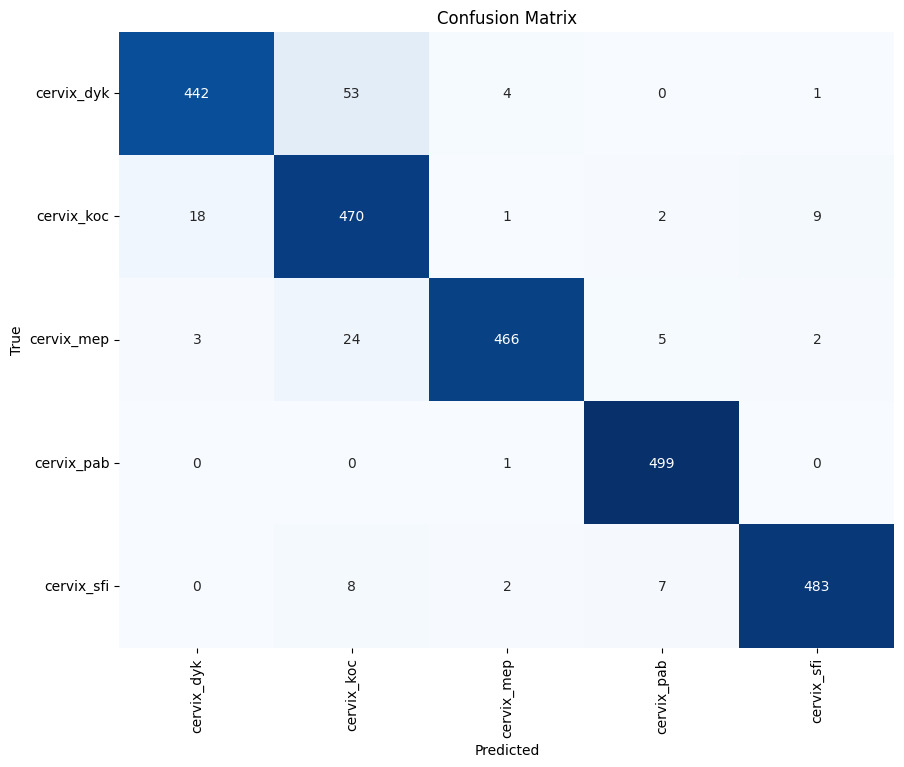

Evaluating model for Breast Cancer
Batch size received in create_generators: 16
Found 7500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
63/63 [==============================] - 7s 101ms/step - loss: 0.1371 - accuracy: 0.9430
Test Loss, Test Accuracy: [0.13709963858127594, 0.9430000185966492]
63/63 [==============================] - 6s 96ms/step
Classification Report:

                  precision    recall  f1-score   support

   breast_benign       0.97      0.91      0.94       500
breast_malignant       0.92      0.97      0.94       500

        accuracy                           0.94      1000
       macro avg       0.94      0.94      0.94      1000
    weighted avg       0.94      0.94      0.94      1000



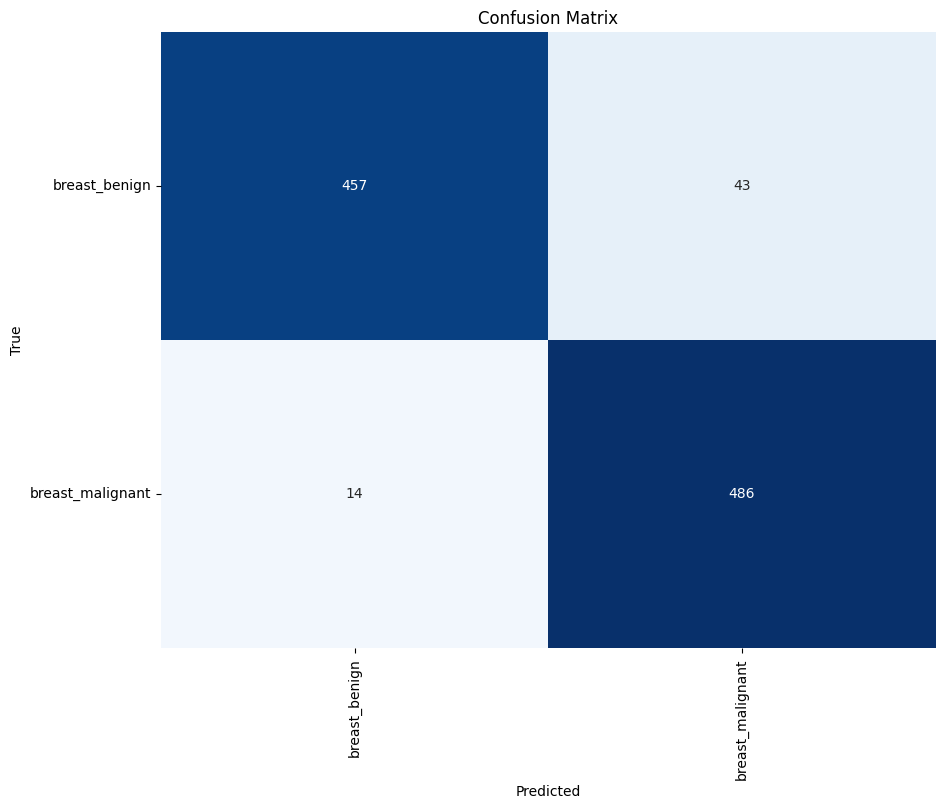

Evaluating model for Brain Cancer
Batch size received in create_generators: 16
Found 11250 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
94/94 [==============================] - 4s 38ms/step - loss: 0.6191 - accuracy: 0.7687
Test Loss, Test Accuracy: [0.6190611720085144, 0.768666684627533]
94/94 [==============================] - 4s 39ms/step
Classification Report:

              precision    recall  f1-score   support

brain_glioma       0.76      0.92      0.84       500
 brain_menin       0.97      0.40      0.57       500
 brain_tumor       0.71      0.98      0.82       500

    accuracy                           0.77      1500
   macro avg       0.82      0.77      0.74      1500
weighted avg       0.82      0.77      0.74      1500



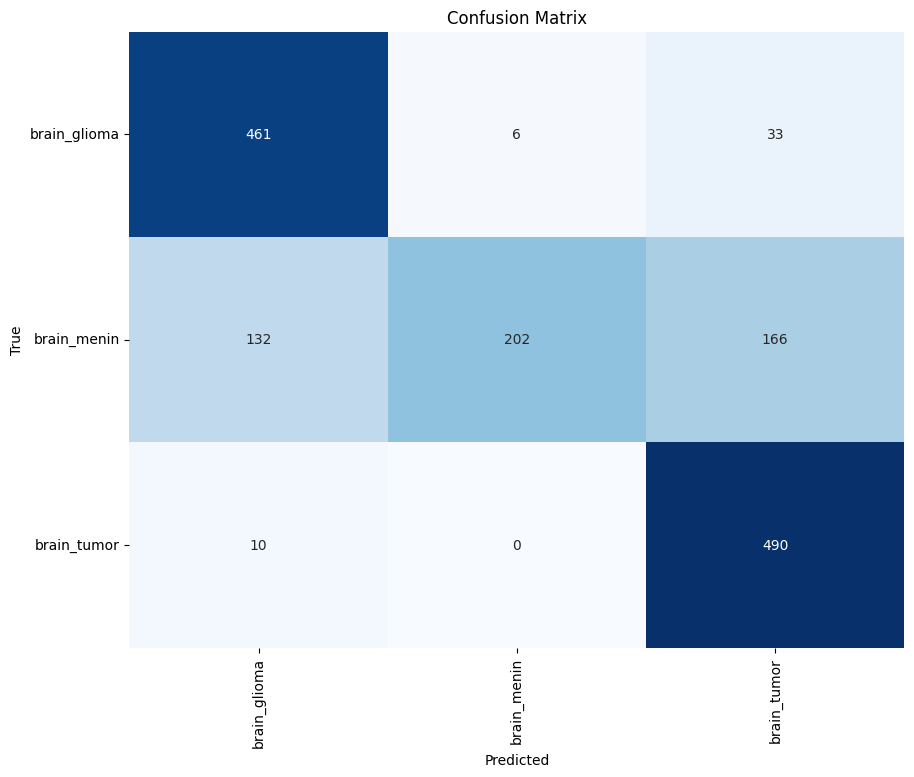

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc  # Garbage Collector

ran_test = ["Oral Cancer"]
for cancer_type in filtered_dirs:
    if cancer_type[0] in ran_test:
        continue

    ran_test.append(cancer_type[0])

    print(f"Evaluating model for {cancer_type[0]}")

    # Load the trained model for this cancer type
    model_path = f'/home/wi223413/CV-SuperRes/TrainedModels/model_{cancer_type[0]}.h5'  # Adjust path as needed
    model = load_model(model_path)

    # Load or create test data generator for this cancer type
    _, _, test_generator = create_generators(base_dir, cancer_type[0], 16)  # Define this function

    # Evaluate the model
    results = model.evaluate(test_generator)
    print(f"Test Loss, Test Accuracy: {results}")

    # Predict on test data
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Generate classification report
    print("Classification Report:\n")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))

    # Generate confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=90)
    plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Free up memory
    del model, test_generator, predictions, predicted_classes, true_classes, class_labels, cm
    gc.collect()
